
<span style="font-size:40px;">Hr Data Analysis</span>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\ishav\\OneDrive\\Desktop\\Hr_Data.csv")

In [193]:
df

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary,year,Salary_hike,Month
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,2011,1902435,8
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,2018,932454,3
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,2023,1501588,3
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689,2023,1040223,10
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082,2024,535082,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,EMP1999996,Cody Russell,Operations,Logistics Coordinator,2010-08-31,"Casefurt, Serbia",3,14,Active,Remote,657648,2010,789177,8
1999996,EMP1999997,Tracey Smith,IT,Software Engineer,2021-05-07,"Dannyport, Kuwait",3,4,Active,On-site,1030109,2021,1081614,5
1999997,EMP1999998,Tracy Lee,Sales,Business Development Manager,2024-05-29,"Craighaven, Nigeria",5,1,Active,Remote,1313085,2024,1378739,5
1999998,EMP1999999,Michael Roberson,IT,Software Engineer,2023-02-14,"Jonathanmouth, Djibouti",4,2,Retired,On-site,1479727,2023,1553713,2


In [7]:
df=df.drop(columns="Unnamed: 0")

In [9]:
df.isnull().sum()

Employee_ID           0
Full_Name             0
Department            0
Job_Title             0
Hire_Date             0
Location              0
Performance_Rating    0
Experience_Years      0
Status                0
Work_Mode             0
Salary_INR            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 11 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Employee_ID         object
 1   Full_Name           object
 2   Department          object
 3   Job_Title           object
 4   Hire_Date           object
 5   Location            object
 6   Performance_Rating  int64 
 7   Experience_Years    int64 
 8   Status              object
 9   Work_Mode           object
 10  Salary_INR          int64 
dtypes: int64(3), object(8)
memory usage: 167.8+ MB


In [13]:
print(df.describe())

       Performance_Rating  Experience_Years    Salary_INR
count        2.000000e+06      2.000000e+06  2.000000e+06
mean         3.000148e+00      5.010287e+00  8.968878e+05
std          1.413973e+00      3.608823e+00  4.026103e+05
min          1.000000e+00      0.000000e+00  3.000000e+05
25%          2.000000e+00      2.000000e+00  6.163460e+05
50%          3.000000e+00      5.000000e+00  8.110265e+05
75%          4.000000e+00      8.000000e+00  1.073745e+06
max          5.000000e+00      1.500000e+01  2.999976e+06


In [15]:
df["year"]=pd.to_datetime(df["Hire_Date"]).dt.year

In [16]:
df.rename(columns={"Salary_INR":"Salary"},inplace=True)

In [19]:
df["Hire_Date"]=pd.to_datetime(df["Hire_Date"])

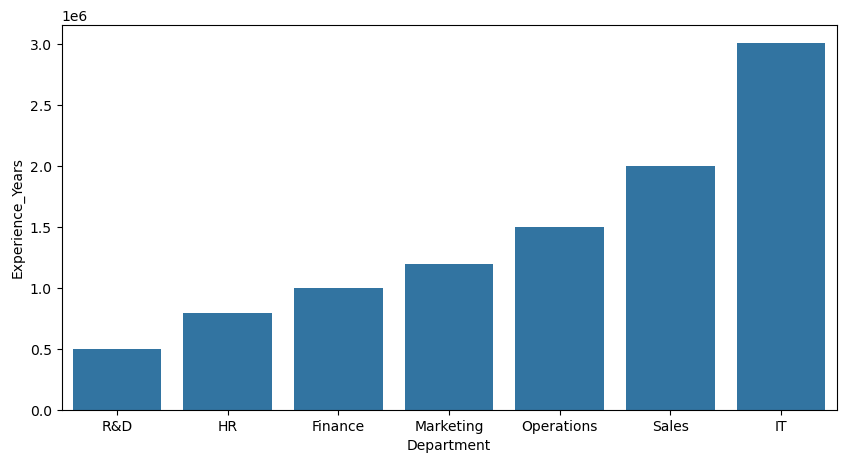

In [101]:
year_group_by=df.groupby("Department")["Experience_Years"].sum().reset_index()
Experienced_Employees=year_group_by.sort_values(by="Experience_Years",ascending=True)
Top10=Experienced_Employees.head(7)
plt.figure(figsize=(10, 5))
sns.barplot(data=Top10,x="Department",y="Experience_Years")

plt.show()

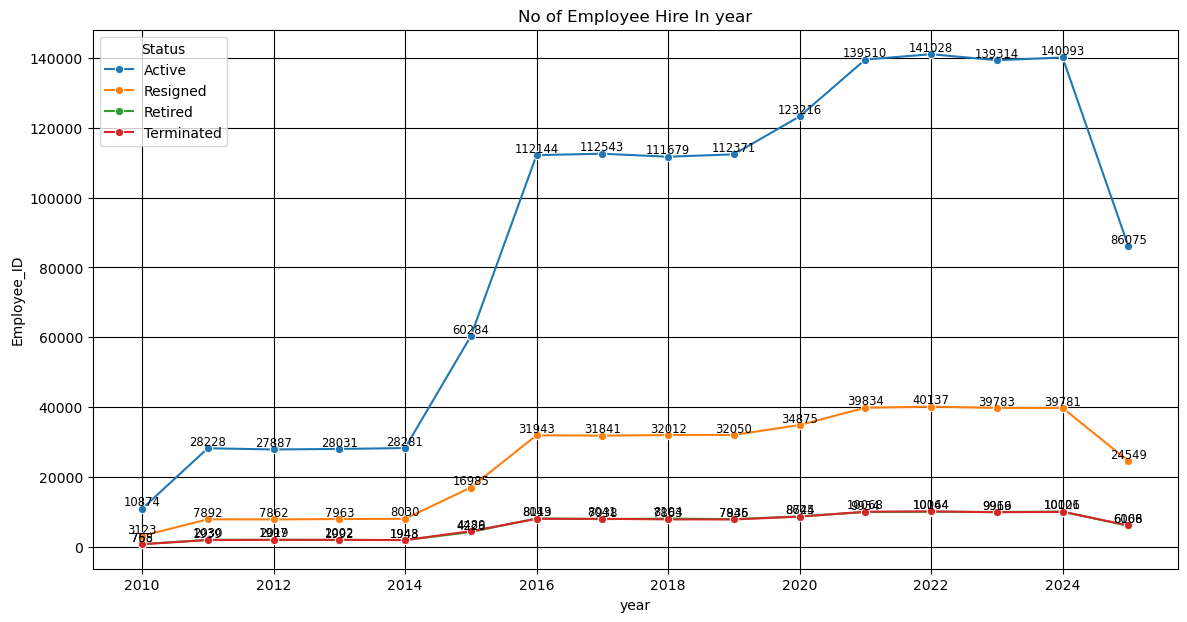

In [23]:
year_group_by=df.groupby(["year","Status"])["Employee_ID"].count().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=year_group_by,x="year",y="Employee_ID",marker="o",color="red",hue="Status")
plt.grid(color="black")
plt.title("No of Employee Hire In year")


for i,values in zip(year_group_by["year"],year_group_by["Employee_ID"]):
    plt.text(i,values,str(values),ha="center",va="bottom",size="small",color="black")
plt.show()

In [25]:
year_group_by=df.groupby(["Full_Name","Department"])["Experience_Years"].max().reset_index()
year_group_by.sort_values(by="Experience_Years",ascending=False).head(10)

,Full_Name,Department,Experience_Years
37979,Amanda Rodriguez,IT,15
817128,Renee Lyons,IT,15
193014,Christina Young,Finance,15
563534,Kenneth Taylor,IT,15
132270,Brian Warren,HR,15
663596,Mary Clarke,Marketing,15
9261,Adriana Livingston,Finance,15
644599,Marcus Wilson,Sales,15
917500,Stephen Foster,HR,15
555142,Kelly Hernandez,Marketing,15


In [27]:
print(year_group_by)

             Full_Name  Department  Experience_Years
0         Aaron Abbott          IT                 5
1         Aaron Abbott   Marketing                 4
2         Aaron Abbott         R&D                 6
3         Aaron Abbott       Sales                14
4        Aaron Acevedo  Operations                 9
...                ...         ...               ...
1029478     Zoe Wright       Sales                 6
1029479      Zoe Wyatt   Marketing                 6
1029480      Zoe Young          IT                 1
1029481      Zoe Young   Marketing                 4
1029482  Zoe Zimmerman       Sales                 2

[1029483 rows x 3 columns]


In [29]:
max(year_group_by["Experience_Years"])

15

In [70]:
df

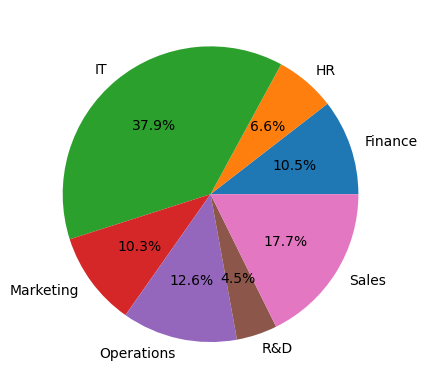

In [29]:
Employee_performance=df.groupby("Department")["Salary"].sum().reset_index()
plt.pie(Employee_performance["Salary"],labels=Employee_performance["Department"],autopct="%1.1f%%")
plt.show()

<Axes: xlabel='Status', ylabel='Employee_Count'>

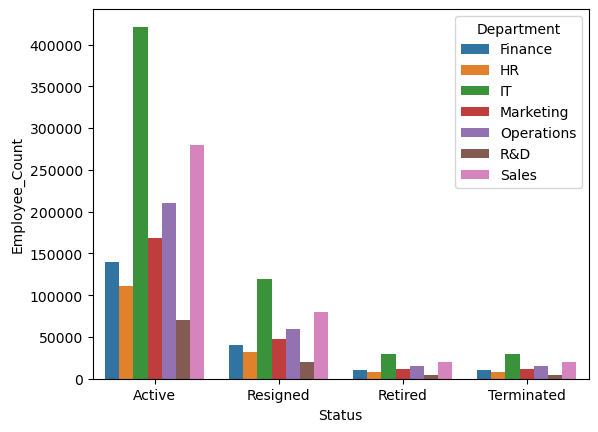

In [31]:
Employee_performance=df.groupby(["Status","Department"])["Status"].value_counts().reset_index()
Employee_performance.columns = ["Status", "Department","Employee_Count"]
sns.barplot(data=Employee_performance,x="Status",y="Employee_Count",hue="Department")

In [31]:
df["Salary_hike"] = np.where(
    (df["Experience_Years"]>=1) & (df["Experience_Years"]<=5),
    df["Salary"] * 1.05,              # 5% increase
    np.where(
        (df["Experience_Years"]>=5) & (df["Experience_Years"]<=10),
        df["Salary"] * 1.10,          # 10% increase
        np.where(
            (df["Experience_Years"]>=10) & (df["Experience_Years"]<=15),
            df["Salary"] * 1.20,      # 20% increase
            df["Salary"]              # no change
        )
    )
)



In [33]:
df.loc[df["Experience_Years"]==0]

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary,year,Salary_hike
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082,2024,535082.0
16,EMP0000017,Robert Martin,Operations,Logistics Coordinator,2025-05-13,"Laurahaven, Afghanistan",3,0,Resigned,On-site,859025,2025,859025.0
18,EMP0000019,Samuel Ferguson,IT,DevOps Engineer,2025-04-05,"Matthewsville, Ghana",2,0,Active,On-site,631273,2025,631273.0
25,EMP0000026,Craig Kelly,IT,Software Engineer,2025-01-15,"Martinmouth, Switzerland",1,0,Resigned,Remote,1201087,2025,1201087.0
36,EMP0000037,Jennifer Conway,Marketing,SEO Specialist,2024-12-11,"South Madison, Nigeria",4,0,Active,Remote,814964,2024,814964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999936,EMP1999937,Lisa Gordon,Finance,Financial Analyst,2025-02-25,"Baxtermouth, Qatar",5,0,Terminated,On-site,1288980,2025,1288980.0
1999956,EMP1999957,Brandi Richards,Operations,Operations Executive,2024-12-28,"Lake Kayla, Mozambique",4,0,Resigned,Remote,1040177,2024,1040177.0
1999965,EMP1999966,William Maldonado,Finance,Financial Analyst,2024-12-02,"Jamesmouth, Seychelles",3,0,Active,On-site,926899,2024,926899.0
1999972,EMP1999973,Frances Faulkner,Marketing,Marketing Executive,2025-08-01,"Kathrynstad, Cuba",4,0,Active,On-site,812140,2025,812140.0


In [35]:
df["Salary_hike"]=df["Salary_hike"].astype(int)

In [37]:
df["Month"]=df["Hire_Date"].dt.month

<Axes: xlabel='Month', ylabel='Employee_ID'>

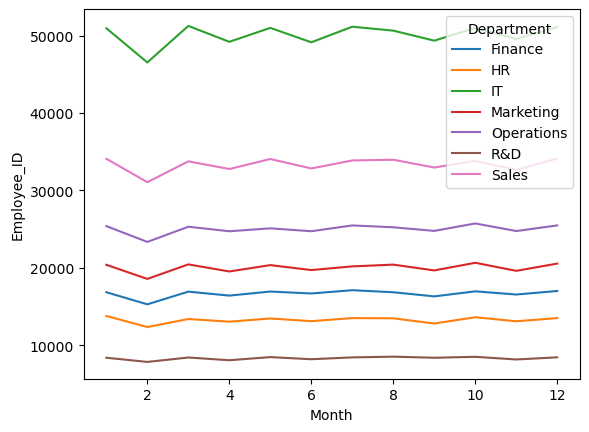

In [39]:
month_empployee_hire=df.groupby(["Month","Department"])["Employee_ID"].count().reset_index()
sns.lineplot(data=month_empployee_hire,x="Month",y="Employee_ID",hue="Department")

<Axes: xlabel='Work_Mode', ylabel='Employee_ID'>

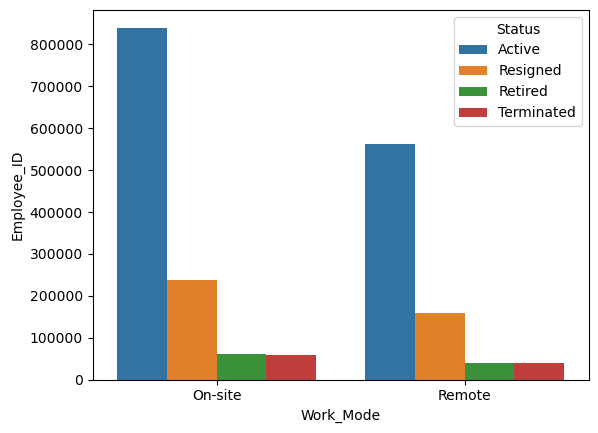

In [41]:
working_employee=df.groupby(["Work_Mode","Status"])["Employee_ID"].count().reset_index()
sns.barplot(data=working_employee,x="Work_Mode",y="Employee_ID",hue="Status")

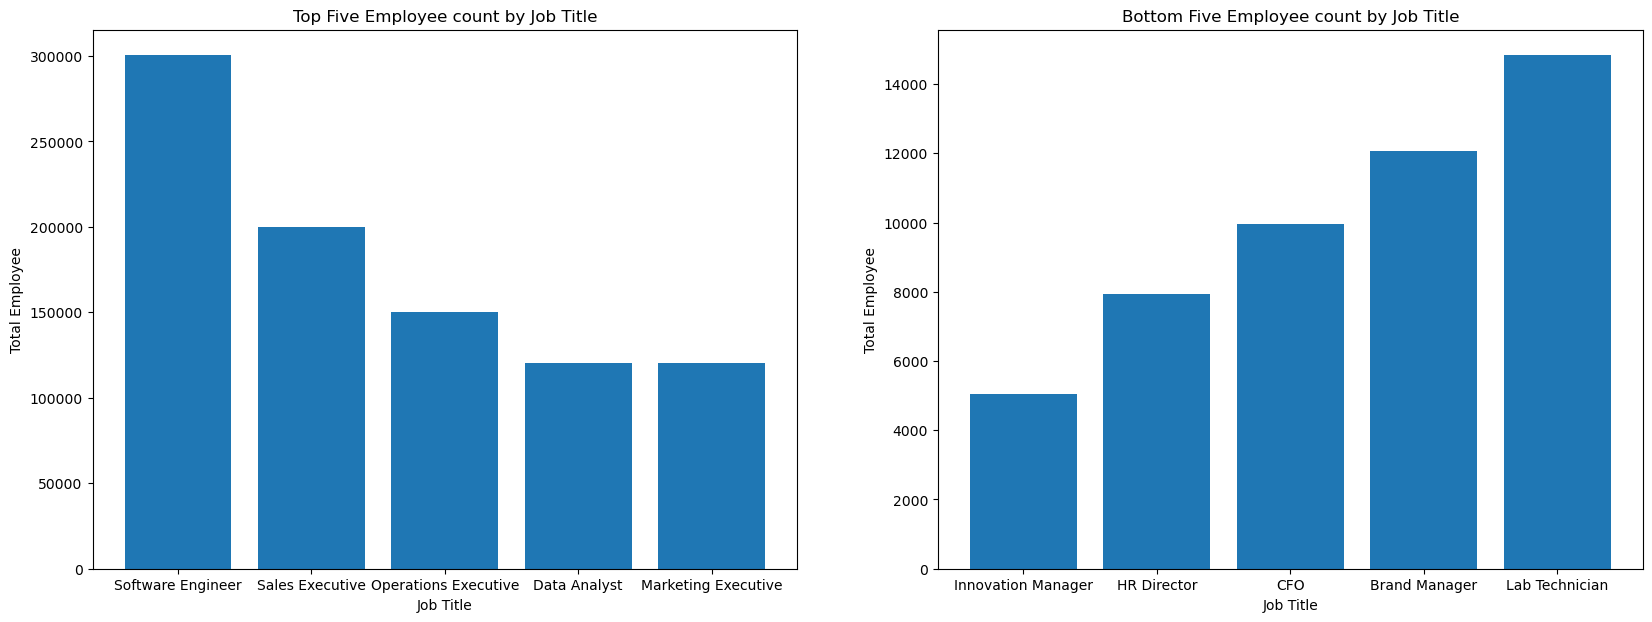

In [189]:
employee_title=df.groupby("Job_Title")["Employee_ID"].count().reset_index()
fig,axs=plt.subplots(1,2,figsize=(20,7))
order_the_job_title=employee_title.sort_values(by="Employee_ID",ascending=False)
top5=order_the_job_title.head(5)
axs[0].bar(top5["Job_Title"],top5["Employee_ID"])
axs[0].set_xlabel("Job Title")
axs[0].set_ylabel("Total Employee")
axs[0].set_title("Top Five Employee count by Job Title")



order_the_job_title=employee_title.sort_values(by="Employee_ID",ascending=True)
Bottom5=order_the_job_title.head(5)
axs[1].bar(Bottom5["Job_Title"],Bottom5["Employee_ID"])
axs[1].set_xlabel("Job Title")
axs[1].set_ylabel("Total Employee")
axs[1].set_title("Bottom Five Employee count by Job Title")
plt.show()


In [173]:
employee_title=df.groupby("Job_Title")["Employee_ID"].count().reset_index()
order_the_job_title=employee_title.sort_values(by="Employee_ID",ascending=True).head(5)
print(order_the_job_title)

             Job_Title  Employee_ID
15  Innovation Manager         5041
11         HR Director         7936
4                  CFO         9952
2        Brand Manager        12081
16      Lab Technician        14829


In [129]:
employee_title=df.groupby("Job_Title")["Employee_ID"].count().reset_index()
print(employee_title)

                        Job_Title  Employee_ID
0                 Account Manager       119929
1                      Accountant       100307
2                   Brand Manager        12081
3    Business Development Manager        60233
4                             CFO         9952
5                             CTO        29888
6              Content Strategist        36154
7                    Data Analyst       120375
8                 DevOps Engineer        90197
9                 Finance Manager        29799
10              Financial Analyst        59815
11                    HR Director         7936
12                   HR Executive        79348
13                     HR Manager        23841
14                     IT Manager        60224
15             Innovation Manager         5041
16                 Lab Technician        14829
17          Logistics Coordinator        90188
18            Marketing Executive       120154
19            Operations Director        14914
20           

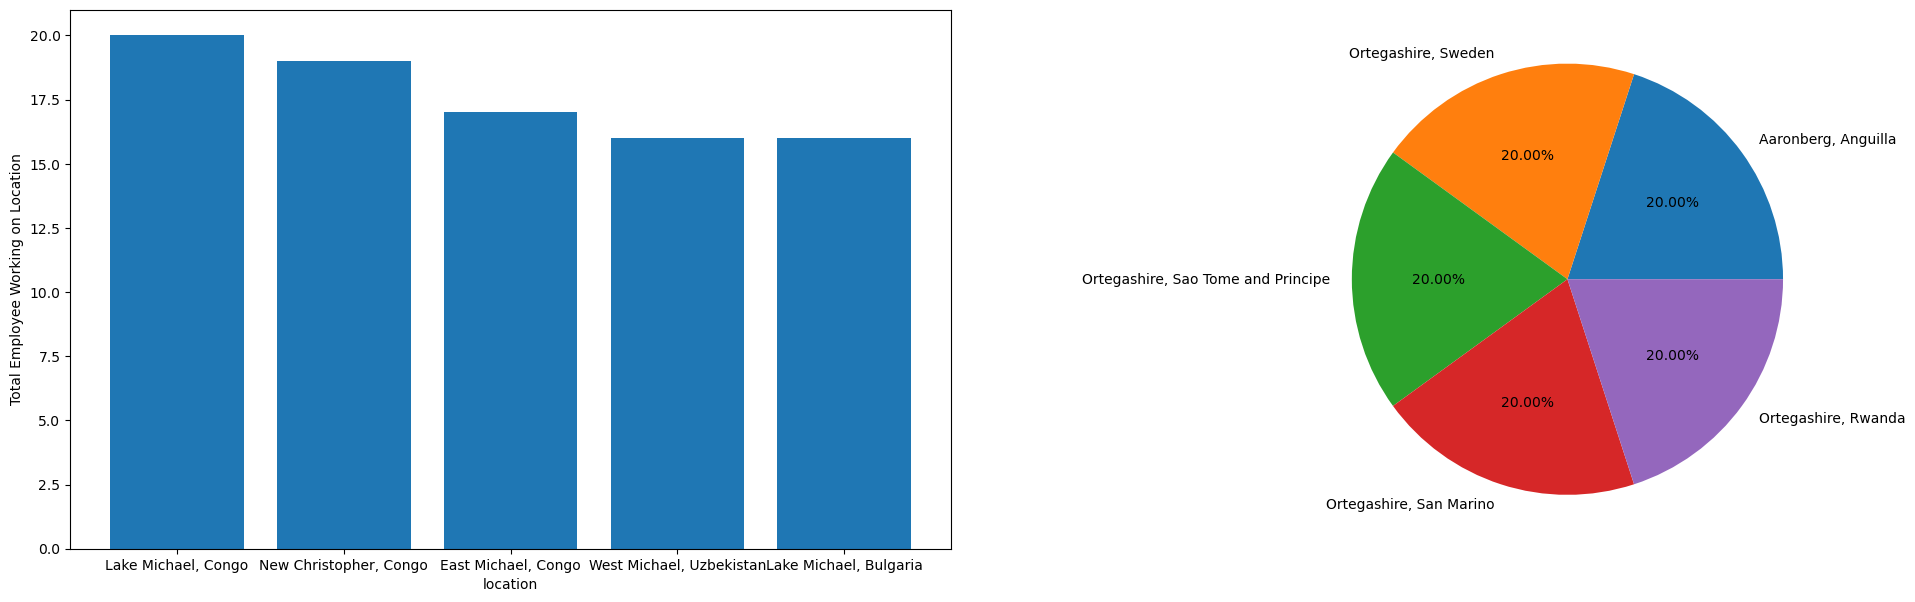

In [236]:
location_based_employee=df.groupby("Location")["Employee_ID"].count().reset_index()
order_by_location=location_based_employee.sort_values(by="Employee_ID",ascending=False)
fig,axs=plt.subplots(1,2,figsize=(25,7))
Top_5=order_by_location.head(5)
axs[0].bar(Top_5["Location"],Top_5["Employee_ID"])
axs[0].set_xlabel("location")
axs[0].set_ylabel("Total Employee Working on Location")


order_by_locations=location_based_employee.sort_values(by="Employee_ID",ascending=True)
Bottom_5=order_by_locations.head(5)
axs[1].pie(Bottom_5["Employee_ID"],labels=Bottom_5["Location"],autopct="%1.2f%%")
plt.show()